# **Exoplanet Scatterplots**

In [119]:
# Importing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
filtered_exoplanets = pd.read_csv('filtered_exoplanet_dataset_removed_outliers.csv')

In [121]:
filtered_exoplanets[filtered_exoplanets['planet_name'] == 'Kepler-452 b']

,planet_name,host_star_name,orbital_period_day,orbit_semi_major_axis_au,planet_rad_earth_rad,planet_rad_jup_rad,planet_mass_earth_mass,planet_mass_jup_mass,Eccentricity,planet_equil_temp_k,spectral_type,stellar_effective_temp_k,stellar_rad_solar_rad,stellar_mass_solar_mass,distance_parsec,stellar_surf_grav,declination_deg,discovery_method,Kepler Planet
3999,Kepler-452 b,Kepler-452,384.844831,1.009733,1.3722,0.138,NaN,NaN,0.0,235.0,G2,5687.166667,0.998333,0.97,551.727,4.446,44.277586,Transit,True


In [151]:
filtered_exoplanets.columns

Index(['planet_name', 'host_star_name', 'orbital_period_day',
       'orbit_semi_major_axis_au', 'planet_rad_earth_rad',
       'planet_rad_jup_rad', 'planet_mass_earth_mass', 'planet_mass_jup_mass',
       'Eccentricity', 'planet_equil_temp_k', 'spectral_type',
       'stellar_effective_temp_k', 'stellar_rad_solar_rad',
       'stellar_mass_solar_mass', 'distance_parsec', 'stellar_surf_grav',
       'declination_deg', 'discovery_method', 'Kepler Planet'],
      dtype='object')

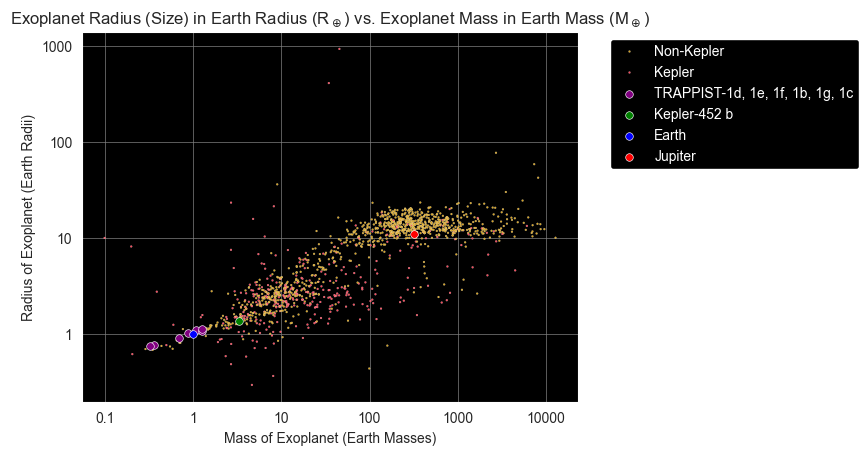

In [204]:
# Sample data for Earth and Jupiter
earth = pd.DataFrame({
    'planet_name': ['Earth'],
    'planet_mass_earth_mass': [1],
    'planet_rad_earth_rad': [1],
    'Kepler Planet': ['Non-Kepler']
})

jupiter = pd.DataFrame({
    'planet_name': ['Jupiter'],
    'planet_mass_earth_mass': [317.8],
    'planet_rad_earth_rad': [11.2],
    'Kepler Planet': ['Non-Kepler']
})

# Combine the highlighted points DataFrame with the original DataFrame
combined_data = pd.concat([filtered_exoplanets, earth, jupiter], ignore_index=True)


# Function to determine if a planet is Kepler or not
def is_kepler(planet_name):
    return 'Kepler' if 'Kepler' in planet_name else 'Non-Kepler'

# Create a new column 'Kepler Planet' based on the 'planet_name' column
filtered_exoplanets['Kepler Planet'] = filtered_exoplanets['planet_name'].apply(is_kepler)

# Define colors for Kepler and non-Kepler planets
colors = {'Kepler': '#FD4659', 'Non-Kepler': 'goldenrod'}

sns.set_style("darkgrid", {"axes.facecolor": "black"})


# Scatter Plot: Exoplanet Radius (Size) in Earth Radius vs. Exoplanet Mass in Earth Mass
sns.scatterplot(data=filtered_exoplanets, x='planet_mass_earth_mass', y='planet_rad_earth_rad', hue='Kepler Planet', palette=colors, s=2)
plt.xlabel('Mass of Exoplanet (Earth Masses)')
plt.ylabel('Radius of Exoplanet (Earth Radii)')
plt.title('Exoplanet Radius (Size) in Earth Radius (R$_\oplus$) vs. Exoplanet Mass in Earth Mass (M$_\oplus$)')

# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Customize tick label format
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Set major ticks for the x-axis
plt.xticks([0.01, 0.1, 1, 10, 100, 1000, 10000], ['0.01', '0.1', '1', '10', '100', '1000', '10000'])

# Set major ticks for the y-axis
plt.yticks([0.01, 0.1, 1, 10, 100, 1000], ['0.01', '0.1', '1', '10', '100', '1000'])

# Highlight TRAPPIST points
highlighted_trappist= filtered_exoplanets[filtered_exoplanets['planet_name'].str.contains('TRAPPIST')]  
sns.scatterplot(data=highlighted_trappist, x='planet_mass_earth_mass', y='planet_rad_earth_rad', color='purple', s=30, label='TRAPPIST-1d, 1e, 1f, 1b, 1g, 1c')

# Manually set the mass of Kepler-452 b
kepler452b_mass = 3.29  # Earth masses
filtered_exoplanets.loc[filtered_exoplanets['planet_name'] == 'Kepler-452 b', 'planet_mass_earth_mass'] = kepler452b_mass

# Highlight specific point for Kepler-452 b
highlighted_kepler452b = filtered_exoplanets[filtered_exoplanets['planet_name'] == 'Kepler-452 b']
sns.scatterplot(data=highlighted_kepler452b, x='planet_mass_earth_mass', y='planet_rad_earth_rad', color='green', s=30, label='Kepler-452 b')

# Highlight specific points for Earth and Jupiter
sns.scatterplot(data=earth, x='planet_mass_earth_mass', y='planet_rad_earth_rad', color='blue', s=30, label='Earth')
sns.scatterplot(data=jupiter, x='planet_mass_earth_mass', y='planet_rad_earth_rad', color='red', s=30, label='Jupiter')

# Change the grid color to be more visible on black background
plt.grid(color='gray', linestyle='-', linewidth=0.5)

# Adjust the legend
legend = plt.legend(facecolor='black', edgecolor='white', framealpha=1, fontsize=10, bbox_to_anchor=(1.05, 1))
for text in legend.get_texts():
    text.set_color('white')


plt.show()


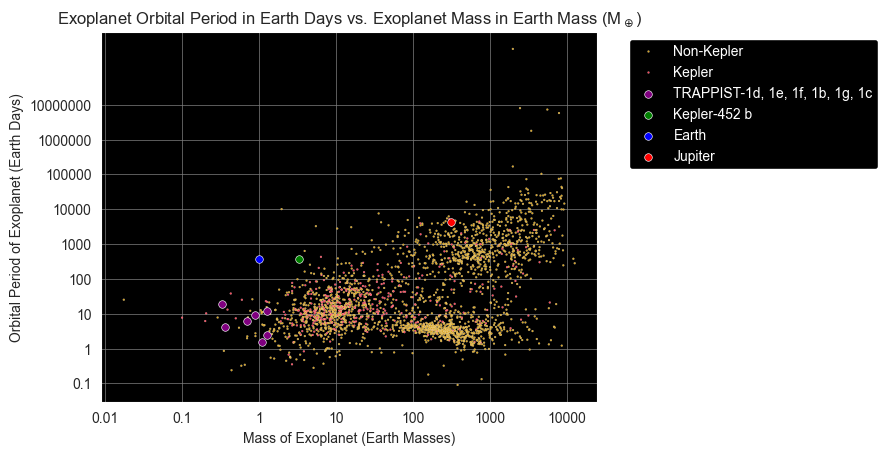

In [205]:
# Sample data for Earth and Jupiter (assuming data points)
earth = pd.DataFrame({
    'planet_name': ['Earth'],
    'planet_mass_earth_mass': [1],
    'orbital_period_day': [365], 
    'Kepler Planet': ['Non-Kepler']
})

jupiter = pd.DataFrame({
    'planet_name': ['Jupiter'],
    'planet_mass_earth_mass': [317.8],
    'orbital_period_day': [4332.59],  # Assuming Jupiter's orbital period is 4332.59 days
    'Kepler Planet': ['Non-Kepler']
})

# Combine the highlighted points DataFrame with the original DataFrame
combined_data = pd.concat([filtered_exoplanets, earth, jupiter], ignore_index=True)

# Function to determine if a planet is Kepler or not
def is_kepler(planet_name):
    return 'Kepler' if 'Kepler' in planet_name else 'Non-Kepler'

# Create a new column 'Kepler Planet' based on the 'planet_name' column
filtered_exoplanets['Kepler Planet'] = filtered_exoplanets['planet_name'].apply(is_kepler)

# Define colors for Kepler and non-Kepler planets
colors = {'Kepler': '#FD4659', 'Non-Kepler': 'goldenrod'}

sns.set_style("darkgrid", {"axes.facecolor": "black"})

# Scatter Plot: Exoplanet Orbital Period (in Earth Days) vs. Exoplanet Mass (in Earth Mass)
sns.scatterplot(data=filtered_exoplanets, x='planet_mass_earth_mass', y='orbital_period_day', hue='Kepler Planet', palette=colors, s=2)
plt.xlabel('Mass of Exoplanet (Earth Masses)')
plt.ylabel('Orbital Period of Exoplanet (Earth Days)')
plt.title('Exoplanet Orbital Period in Earth Days vs. Exoplanet Mass in Earth Mass (M$_\oplus$)')

# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Customize tick label format
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Set major ticks for the x-axis
plt.xticks([0.01, 0.1, 1, 10, 100, 1000, 10000], ['0.01', '0.1', '1', '10', '100', '1000', '10000'])

# Set major ticks for the y-axis
plt.yticks([0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000], ['0.01', '0.1', '1', '10', '100', '1000', '10000', '100000', '1000000', '10000000'])


# Highlight TRAPPIST points
highlighted_trappist= filtered_exoplanets[filtered_exoplanets['planet_name'].str.contains('TRAPPIST')]  
sns.scatterplot(data=highlighted_trappist, x='planet_mass_earth_mass', y='orbital_period_day', color='purple', s=30, label='TRAPPIST-1d, 1e, 1f, 1b, 1g, 1c')

# Highlight specific point for Kepler-452 b
highlighted_kepler452b = filtered_exoplanets[filtered_exoplanets['planet_name'] == 'Kepler-452 b']
sns.scatterplot(data=highlighted_kepler452b, x='planet_mass_earth_mass', y='orbital_period_day', color='green', s=30, label='Kepler-452 b')


# Highlight specific points for Earth and Jupiter
sns.scatterplot(data=earth, x='planet_mass_earth_mass', y='orbital_period_day', color='blue', s=30, label='Earth')
sns.scatterplot(data=jupiter, x='planet_mass_earth_mass', y='orbital_period_day', color='red', s=30, label='Jupiter')

# Change the grid color to be more visible on black background
plt.grid(color='gray', linestyle='-', linewidth=0.5)

# Adjust the legend
legend = plt.legend(facecolor='black', edgecolor='white', framealpha=1, fontsize=10, bbox_to_anchor=(1.05, 1))
for text in legend.get_texts():
    text.set_color('white')

plt.show()


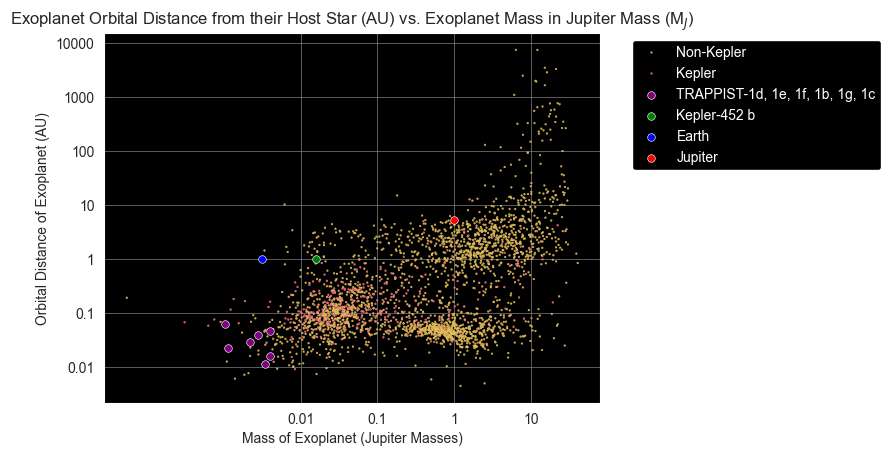

In [240]:
# Sample data for Jupiter (assuming data points)
jupiter = pd.DataFrame({
    'planet_name': ['Jupiter'],
    'planet_mass_jup_mass': [1],
    'orbit_semi_major_axis_au': [5.2], 
})

earth = pd.DataFrame( {
     'planet_name': ['Earth'],
    'planet_mass_jup_mass': [0.00315],
    'orbit_semi_major_axis_au': [1]
})

# Combine the highlighted points DataFrame with the original DataFrame
combined_data = pd.concat([filtered_exoplanets, jupiter], ignore_index=True)

# Function to determine if a planet is Kepler or not
def is_kepler(planet_name):
    return 'Kepler' if 'Kepler' in planet_name else 'Non-Kepler'

# Create a new column 'Kepler Planet' based on the 'planet_name' column
filtered_exoplanets['Kepler Planet'] = filtered_exoplanets['planet_name'].apply(is_kepler)

# Define colors for Kepler and non-Kepler planets
colors = {'Kepler': '#FD4659', 'Non-Kepler': 'goldenrod'}

sns.set_style("darkgrid", {"axes.facecolor": "black"})

# Scatter Plot: Exoplanet Orbital Distance (in AU) vs. Exoplanet Mass (in Jupiter Mass)
sns.scatterplot(data=filtered_exoplanets, x='planet_mass_jup_mass', y='orbit_semi_major_axis_au', hue='Kepler Planet', palette=colors, s=2)
plt.xlabel('Mass of Exoplanet (Jupiter Masses)')
plt.ylabel('Orbital Distance of Exoplanet (AU)')
plt.title('Exoplanet Orbital Distance from their Host Star (AU) vs. Exoplanet Mass in Jupiter Mass (M$_J$)')

# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Customize tick label format
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Set major ticks for the x-axis
plt.xticks([0.01, 0.1, 1, 10, 100, 1000, 10000], ['0.01', '0.1', '1', '10', '100', '1000', '10000'])


# Set major ticks for the y-axis
plt.yticks([0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], ['0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000'])

# Highlight TRAPPIST points
highlighted_trappist= filtered_exoplanets[filtered_exoplanets['planet_name'].str.contains('TRAPPIST')]  
sns.scatterplot(data=highlighted_trappist, x='planet_mass_jup_mass', y='orbit_semi_major_axis_au', color='purple', s=30, label='TRAPPIST-1d, 1e, 1f, 1b, 1g, 1c')

# Manually set the Jupiter mass of Kepler-452 b
kepler452b_mass = 0.01575  # Jupiter masses
filtered_exoplanets.loc[filtered_exoplanets['planet_name'] == 'Kepler-452 b', 'planet_mass_jup_mass'] = kepler452b_mass

# Highlight specific point for Kepler-452 b
highlighted_kepler452b = filtered_exoplanets[filtered_exoplanets['planet_name'] == 'Kepler-452 b']
sns.scatterplot(data=highlighted_kepler452b, x='planet_mass_jup_mass', y='orbit_semi_major_axis_au', color='green', s=30, label='Kepler-452 b')

# Highlight specific points for Earth and Jupiter
sns.scatterplot(data=earth, x='planet_mass_jup_mass', y='orbit_semi_major_axis_au', color='blue', s=30, label='Earth')
sns.scatterplot(data=jupiter, x='planet_mass_jup_mass', y='orbit_semi_major_axis_au', color='red', s=30, label='Jupiter')




# Change the grid color to be more visible on black background
plt.grid(color='gray', linestyle='-', linewidth=0.5)

# Adjust the legend
legend = plt.legend(facecolor='black', edgecolor='white', framealpha=1, fontsize=10, bbox_to_anchor=(1.05, 1))
for text in legend.get_texts():
    text.set_color('white')

plt.show()
